In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#Вивести перші рядки таблиці за допомогою методу head
tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96", attrs={"class": "wikitable sortable"}, decimal=",")
tmp = tmp[0]
tmp_n = tmp.iloc[:, 1:].div(10)
print(tmp)
print(tmp_n.head())

                       регіон   1950   1960   1970  1990  1992  1994  1996  \
0   Автономна Республіка Крим  230.0  206.0  160.0   130   109    93    80   
1           Вінницька область  224.0  192.0  142.0   124   119   107   103   
2           Волинська область  247.0  250.0  179.0   153   150   137   125   
3    Дніпропетровська область  204.0  204.0  151.0   123   106    92    80   
4            Донецька область  271.0  214.0  140.0   109    94    82    70   
5         Житомирська область  261.0  223.0  159.0   129   128   118   108   
6        Закарпатська область  314.0  273.0  207.0   168   161   138   128   
7          Запорізька область  219.0  197.0  150.0   124   107    92    81   
8   Івано-Франківська область  243.0  248.0  182.0   155   144   131   122   
9            Київська область  204.0  189.0  156.0   123   111    99    92   
10     Кіровоградська область  216.0  171.0  145.0   126   119   107    96   
11          Луганська область  262.0  235.0  144.0   116   101  

In [2]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(tmp.shape)

(28, 13)


In [3]:
#Замініть у таблиці значення "—" на значення NaN
tmp_n = tmp_n.replace('—', float('nan'))
print(tmp_n)

    1950  1960  1970  1990  1992  1994  1996  2000  2004  2008  2012  2014
0   23.0  20.6  16.0  13.0  10.9   9.3   8.0   7.3   9.0  11.9  12.6   NaN
1   22.4  19.2  14.2  12.4  11.9  10.7  10.3   8.4   9.0  10.8  11.2  10.9
2   24.7  25.0  17.9  15.3  15.0  13.7  12.5  11.2  11.9  14.8  14.8  14.1
3   20.4  20.4  15.1  12.3  10.6   9.2   8.0   7.1   8.9  11.0  11.2  11.1
4   27.1  21.4  14.0  10.9   9.4   8.2   7.0   6.1   7.6   9.8   9.8   8.2
5   26.1  22.3  15.9  12.9  12.8  11.8  10.8   8.9   9.8  11.3  12.2  12.0
6   31.4  27.3  20.7  16.8  16.1  13.8  12.8  11.5  12.4  14.7  15.1  14.6
7   21.9  19.7  15.0  12.4  10.7   9.2   8.1   7.1   8.5  10.3  10.6  10.6
8   24.3  24.8  18.2  15.5  14.4  13.1  12.2  10.3  10.7  12.3  12.4  12.2
9   20.4  18.9  15.6  12.3  11.1   9.9   9.2   7.3   9.0  11.7  12.2  12.1
10  21.6  17.1  14.5  12.6  11.9  10.7   9.6   7.9   8.6  10.2  11.0  10.8
11  26.2  23.5  14.4  11.6  10.1   8.4   7.2   6.2   7.3   9.5   9.6   5.1
12  23.4  24.0  17.1  14.

In [4]:
#визначте типи всіх стовпців за допомогою dataframe.dtypes
print(tmp_n.dtypes)


1950    float64
1960    float64
1970    float64
1990    float64
1992    float64
1994    float64
1996    float64
2000    float64
2004    float64
2008    float64
2012    float64
2014    float64
dtype: object


In [5]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
tmp_n = tmp_n.apply(pd.to_numeric, errors='ignore') 
print(tmp_n.dtypes)

1950    float64
1960    float64
1970    float64
1990    float64
1992    float64
1994    float64
1996    float64
2000    float64
2004    float64
2008    float64
2012    float64
2014    float64
dtype: object


1950    7.142857
1960    3.571429
1970    3.571429
1990    0.000000
1992    0.000000
1994    0.000000
1996    0.000000
2000    0.000000
2004    0.000000
2008    0.000000
2012    0.000000
2014    7.142857
dtype: float64


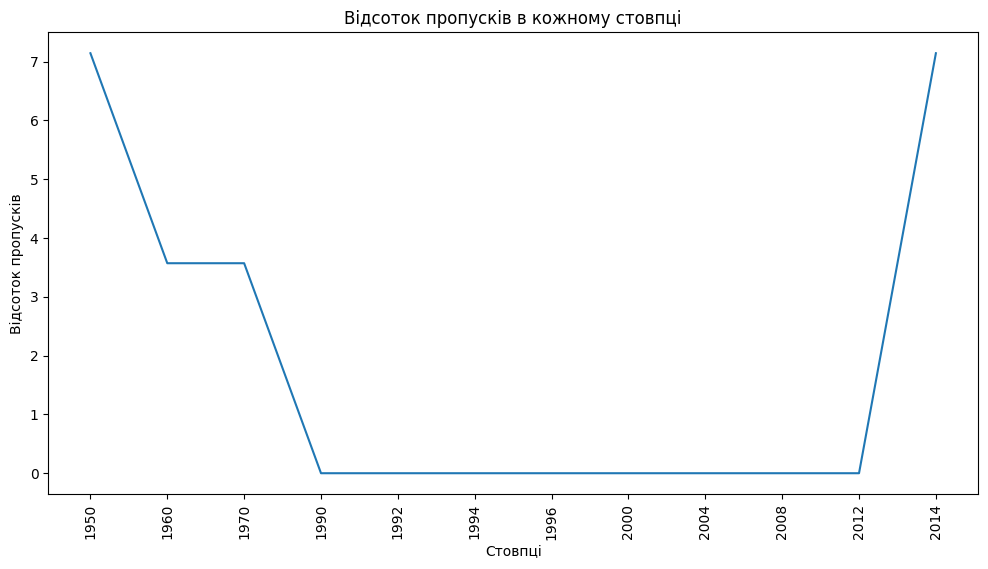

In [6]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_percentage = tmp_n.isnull().sum() / len(tmp_n) * 100
print(missing_percentage)
plt.figure(figsize=(12, 6))
plt.plot(missing_percentage.index, missing_percentage )
plt.xticks(rotation=90)
plt.xlabel("Стовпці")
plt.ylabel("Відсоток пропусків")
plt.title("Відсоток пропусків в кожному стовпці")
plt.show()

In [7]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
tmp_n = tmp_n.drop(tmp_n.index[-1])
print(tmp_n)


    1950  1960  1970  1990  1992  1994  1996  2000  2004  2008  2012  2014
0   23.0  20.6  16.0  13.0  10.9   9.3   8.0   7.3   9.0  11.9  12.6   NaN
1   22.4  19.2  14.2  12.4  11.9  10.7  10.3   8.4   9.0  10.8  11.2  10.9
2   24.7  25.0  17.9  15.3  15.0  13.7  12.5  11.2  11.9  14.8  14.8  14.1
3   20.4  20.4  15.1  12.3  10.6   9.2   8.0   7.1   8.9  11.0  11.2  11.1
4   27.1  21.4  14.0  10.9   9.4   8.2   7.0   6.1   7.6   9.8   9.8   8.2
5   26.1  22.3  15.9  12.9  12.8  11.8  10.8   8.9   9.8  11.3  12.2  12.0
6   31.4  27.3  20.7  16.8  16.1  13.8  12.8  11.5  12.4  14.7  15.1  14.6
7   21.9  19.7  15.0  12.4  10.7   9.2   8.1   7.1   8.5  10.3  10.6  10.6
8   24.3  24.8  18.2  15.5  14.4  13.1  12.2  10.3  10.7  12.3  12.4  12.2
9   20.4  18.9  15.6  12.3  11.1   9.9   9.2   7.3   9.0  11.7  12.2  12.1
10  21.6  17.1  14.5  12.6  11.9  10.7   9.6   7.9   8.6  10.2  11.0  10.8
11  26.2  23.5  14.4  11.6  10.1   8.4   7.2   6.2   7.3   9.5   9.6   5.1
12  23.4  24.0  17.1  14.

In [8]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
tmp_filled = tmp_n.fillna(tmp_n.mean())
tmp_filled = tmp_filled.round(2)
print(tmp_filled)


    1950   1960  1970  1990  1992  1994  1996  2000  2004  2008  2012   2014
0   23.0  20.60  16.0  13.0  10.9   9.3   8.0   7.3   9.0  11.9  12.6  11.14
1   22.4  19.20  14.2  12.4  11.9  10.7  10.3   8.4   9.0  10.8  11.2  10.90
2   24.7  25.00  17.9  15.3  15.0  13.7  12.5  11.2  11.9  14.8  14.8  14.10
3   20.4  20.40  15.1  12.3  10.6   9.2   8.0   7.1   8.9  11.0  11.2  11.10
4   27.1  21.40  14.0  10.9   9.4   8.2   7.0   6.1   7.6   9.8   9.8   8.20
5   26.1  22.30  15.9  12.9  12.8  11.8  10.8   8.9   9.8  11.3  12.2  12.00
6   31.4  27.30  20.7  16.8  16.1  13.8  12.8  11.5  12.4  14.7  15.1  14.60
7   21.9  19.70  15.0  12.4  10.7   9.2   8.1   7.1   8.5  10.3  10.6  10.60
8   24.3  24.80  18.2  15.5  14.4  13.1  12.2  10.3  10.7  12.3  12.4  12.20
9   20.4  18.90  15.6  12.3  11.1   9.9   9.2   7.3   9.0  11.7  12.2  12.10
10  21.6  17.10  14.5  12.6  11.9  10.7   9.6   7.9   8.6  10.2  11.0  10.80
11  26.2  23.50  14.4  11.6  10.1   8.4   7.2   6.2   7.3   9.5   9.6   5.10

In [9]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate = tmp_filled["2014"].mean()  # Обчислення середнього значення рівня народжуваності
higher_than_average = tmp_filled[tmp_filled["2014"] > average_birth_rate]  # Фільтрація за умовою
#regions = tmp['регіон']
#print(regions)

regions_table = higher_than_average.merge(tmp[["регіон"]], left_index=True, right_index=True)
print(regions_table["регіон"])


2             Волинська область
5           Житомирська область
6          Закарпатська область
8     Івано-Франківська область
9              Київська область
12            Львівська область
13         Миколаївська область
14              Одеська область
16           Рівненська область
20           Херсонська область
21          Хмельницька область
23          Чернівецька область
25                         Київ
Name: регіон, dtype: object


Регіон з найвищою народжуваністю у 2014 році: Рівненська область


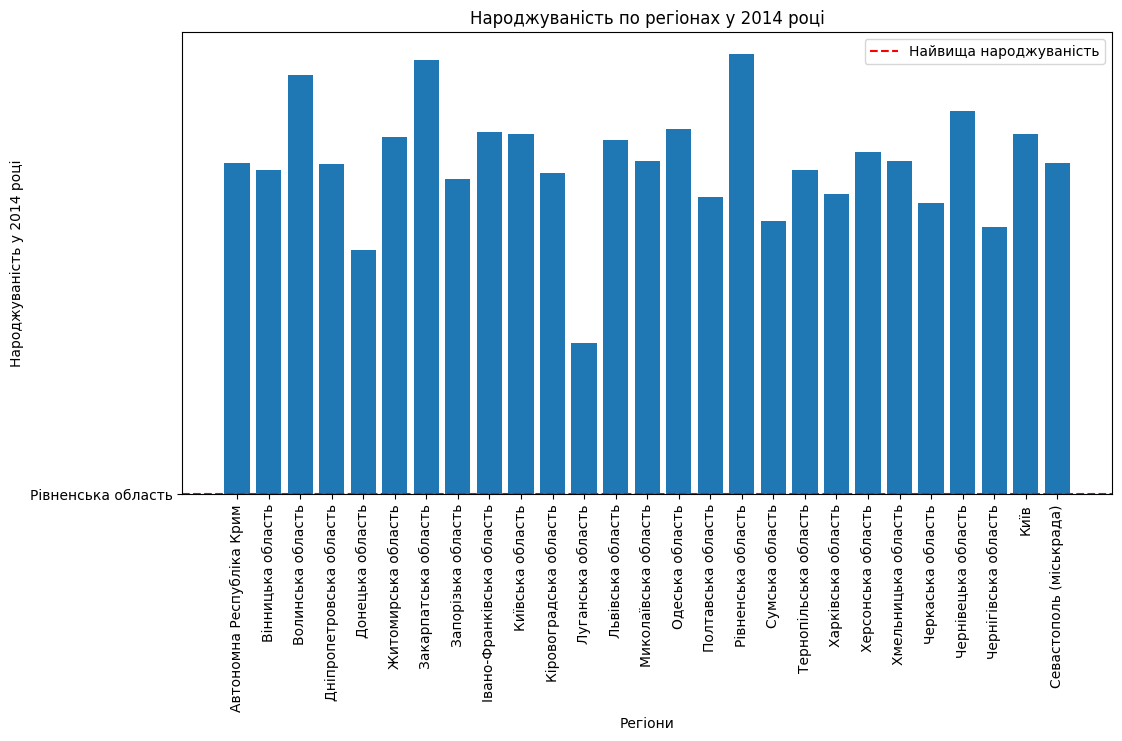

In [10]:
#У якому регіоні була найвища народжуваність у 2014 році?
regions_table = tmp[["регіон"]].merge(tmp_filled, left_index=True, right_index=True)

max_birth_rate_region = regions_table.loc[regions_table["2014"].idxmax(), "регіон"]
print("Регіон з найвищою народжуваністю у 2014 році:", max_birth_rate_region)           

plt.figure(figsize=(12, 6))
plt.bar(regions_table["регіон"], regions_table["2014"])
plt.xticks(rotation=90)
plt.xlabel("Регіони")
plt.ylabel("Народжуваність у 2014 році")
plt.title("Народжуваність по регіонах у 2014 році")
plt.axhline(y=max_birth_rate_region, color='r', linestyle='--', label="Найвища народжуваність")
plt.legend()
plt.show()

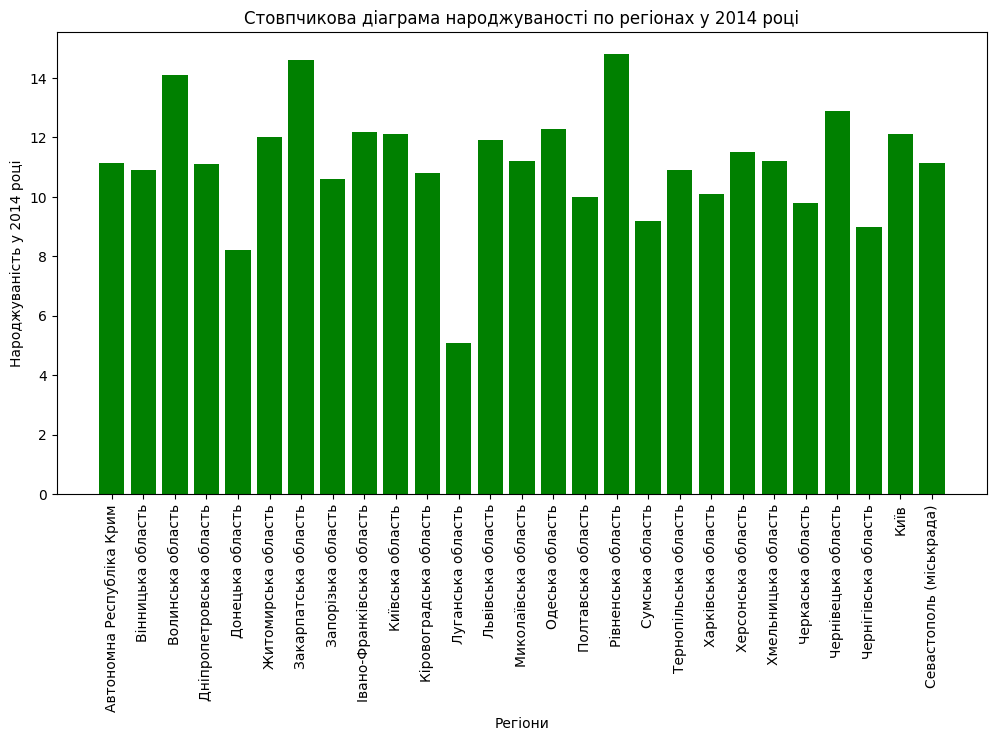

In [11]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2014 році
regions_table = tmp[["регіон"]].merge(tmp_filled, left_index=True, right_index=True)

regions = regions_table["регіон"]
birth_rates_14 = tmp_filled["2014"]

# Побудова стовпчикової діаграми
plt.figure(figsize=(12, 6))
plt.bar(regions, birth_rates_14 ,  color='green')
plt.xticks(rotation=90)
plt.xlabel("Регіони")
plt.ylabel("Народжуваність у 2014 році")
plt.title("Стовпчикова діаграма народжуваності по регіонах у 2014 році")
plt.show()